#objective: in this project i have collected data from ebay by web scraping and, i did many data manuplulations(sorting, cleaning,arranging) to anylyse the data for four different products(plyastatiopn4 , iphone , iwatch ,hover board). by using this anylysys a trder can decide what type of products he can sell at ebay at optimum quantities and with optimamum prises.

                                     WORKING PROCESS
                                     
1.i have made a code such that the trader can get the information of any product(product name,price, number of item sold, url of individuval product and curency ) by simply typing the product name in dialouge box which popup after runing below code.

2.after that this program will create and store all the data in csv formates in the directory automatically.

3.user can download multiple product informations, by which he can compare in selected products.

4.after that user need to upload that individual csv file

5.after that i made a code such that it will clean that data and plot the graphs individuvally and produce a final bar graph where use can uderstand whcih can go bulk amount into the market



                     BELOW I AM IMPORTING ALL MODULES wich i use

In [11]:
import csv
import requests
from bs4 import BeautifulSoup
import locale
import pandas as pd
import re
import unicodedata
import  matplotlib.pyplot as plt
import numpy as np





 the basic i dea is i want to create a function so that it can automatically runs all its sub functions and give use out put csv in one click.
 1. in the below function it takes the main page url from url manupulating function as an argument and runs to produce soup of the gape by using BeautifulSoup

In [2]:
def get_page(url):
    i=0
    page = requests.get(url)                      # calling html page
    print(page.ok)                                # to know wether server is respondig or 
    print(page.status_code)
    if (page.ok==False):                          #to chek the server is working or not 
        print('server response'+page.status_code)
    else:
        soup = BeautifulSoup(page.text, 'lxml')   # initiating soup
        
    return soup


1. in below function soup will be taken as an argument this soup will come from index function and scrapes the  details of the product like price , number of items sold , product name ,currency. and save all details in a dictionary which i will use forether to develope csv file.

In [3]:
def detailed_data(soup):#titile,price,itemsold 
    i=0
    i+=1
    try:#title
        title=soup.select('h1.it-ttl')[0].text.strip()
        onlytitle=(title.split(' ', 3)[3]).replace('\xa0','')  #spliting and replacement 
    except:
        title=''
    print(onlytitle)
    
    try:#number of sold items
        sold=soup.find("a", attrs={'class':'vi-txt-underline'}).text
        onlysold=sold.split(' ', -1)[0] 
        #price=soup.select('vi-txt-underline')[0].text.strip()
        #onlytitle=title.split(' ', 2)[2] 
    except:
        onlysold=''
    print(onlysold)
    
    try:#price
        price=soup.find("span", attrs={'class':'notranslate'}).text
        onlyprice=(price.split(' ', 1)[1]).replace('$', '')
    except:
        onlyprice=''
    print(onlyprice)
    
    try:#curency
        curency=soup.find("span", attrs={'class':'notranslate'}).text
        onlycurency=(curency.split(' ', 1)[0]).replace('$', '')
    except:
        onlycurency=''
    print(onlycurency)                    #generating dictionery 
    
    data={
        'title':onlytitle ,
        'price':onlyprice ,
        'sold':onlysold,
        'curency':onlycurency
         }
    print(data)
    return(data)

    
    

below i have created a sub function so that it will give index page url  for the product . this index url will be forether sent to product detals finctions to get product details of each product

In [4]:
def get_index_data(soup):
    try:
        links=soup.find_all('a',class_='s-item__link') #finding individuval product urls
    except:
        links=''
        
    url=[item.get('href') for item in links]          # finding href class
    return(url)
    print(url)

i am creating below function to create a csv file where we can store the details of the data wich will be scraped from the product details page function.

In [5]:
def write_csv(data,url):
    with open('iwatch.csv','a') as csvfile:     # naming and opening csv 
        writer=csv.writer(csvfile)
        row=[data['title'],data['price'],data['sold'],data['curency'],url]
        writer.writerow(row)

below function is main function . this function ask user  what product he wants to scrap the data and generates the reqired url . and that url will be sent to index function to get product index page .
and runs a loop where user ger forst 30 pages data .it is obvious to find unicoes in between scraping . so i have another function wich can solve and send it back the rectified data. which will be fortherly saved into csv file.

In [10]:
def main():
    input_to=input("enter the name of the product to scrape the data")
    for i in range(0,30):  
        url='https://www.ebay.com/sch/i.html?_nkw='+input_to+'&_sacat=0&_pgn='+str(i) #manupulating url
        products=(get_index_data(get_page(url)))
        for link in products:
            data=detailed_data(get_page(link))
            print(type(data))
            if type(data)=="<type 'unicode'>":
                data=to_uni(data)
                write_csv(data,link)
            
            print(data)
            write_csv(data,link)


this below function can solve unicode erroes like 'iso-8859-1','windows-1252','uf8ff' and sent rectified data to the main function to write into the csv file 

In [7]:
def to_uni(lst):
    encodings = ['iso-8859-1','windows-1252','uf8ff']     
    uni_lst = []
    done = 0
    for x in encodings:
            for s in lst:
                if type(s)==unicode:
                    uni_lst.append(s)
                    done +=1
                else:
                    try:
                        uni_lst.append(s.decode(x,'strict'))
                        done += 1
                        print ("Decoded %s with encoding %s"% (s,x))
                    except UnicodeError:
                        uni_lst = []
                        done = 0
                        print ("Couldn't decode %s with encoding %s"%(s,x))
                        break
            if done == len(lst):
                break
    if not done == len(lst):
        print ("Could not convert to unicode, proceeding with caution")
    #normalise the standard unicode
    norm = [ unicodedata.normalize('NFKD',s) for s in uni_lst ]
    #get rid of any blank entries in the list
    noblanks = [s for s in norm if re.search('\S',s)]
    return noblanks
    

this below function will trigger the main function wich will run all the loops and sub functions to get the reqired data.

In [8]:
if __name__ == '__main__':
    main()

enter the name of the product to scrape the dataiphone
True
200
True
200
Apple iPhone 7 Plus 128GB Black/Rose Gold/Silver Unlocked AT&T Verizon T-Mobile
58
175.00
US
{'title': 'Apple iPhone 7 Plus 128GB Black/Rose Gold/Silver Unlocked AT&T Verizon T-Mobile', 'price': '175.00', 'sold': '58', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 7 Plus 128GB Black/Rose Gold/Silver Unlocked AT&T Verizon T-Mobile', 'price': '175.00', 'sold': '58', 'curency': 'US'}
True
200
Apple iPhone 7 - 128GB All Colors - GSM Unlocked
137
219.99/ea
US
{'title': 'Apple iPhone 7 - 128GB All Colors - GSM Unlocked', 'price': '219.99/ea', 'sold': '137', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 7 - 128GB All Colors - GSM Unlocked', 'price': '219.99/ea', 'sold': '137', 'curency': 'US'}
True
200
Apple iPhone 7 32GB 128GB 256gb GSM Factory Unlocked
63
139.95
US
{'title': 'Apple iPhone 7 32GB 128GB 256gb GSM Factory Unlocked', 'price': '139.95', 'sold': '63', 'curency': 'US'}
<class 'dict'>
{'tit

True
200
Apple iPhone 8 Fully Unlocked 64GB, 256GB, 4G LTE CDMA + GSM Smartphone
242
289.99
US
{'title': 'Apple iPhone 8 Fully Unlocked 64GB, 256GB, 4G LTE CDMA + GSM Smartphone', 'price': '289.99', 'sold': '242', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 8 Fully Unlocked 64GB, 256GB, 4G LTE CDMA + GSM Smartphone', 'price': '289.99', 'sold': '242', 'curency': 'US'}
True
200
Apple iPhone 7 "Factory Unlocked" 32GB 4G LTE iOS Smartphone
519
166.95
US
{'title': 'Apple iPhone 7 "Factory Unlocked" 32GB 4G LTE iOS Smartphone', 'price': '166.95', 'sold': '519', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 7 "Factory Unlocked" 32GB 4G LTE iOS Smartphone', 'price': '166.95', 'sold': '519', 'curency': 'US'}
True
200
Apple iPhone 8 a1863 64GB Verizon Very Good Condition (Unlocked)
885
274.99/ea
US
{'title': 'Apple iPhone 8 a1863 64GB Verizon Very Good Condition (Unlocked)', 'price': '274.99/ea', 'sold': '885', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 8 a1863

True
200
Apple iPhone X 256GB Space Gray GSM Factory Unlocked (Verizon). Mint Condition

399.00
US
{'title': 'Apple iPhone X 256GB Space Gray GSM Factory Unlocked (Verizon). Mint Condition', 'price': '399.00', 'sold': '', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone X 256GB Space Gray GSM Factory Unlocked (Verizon). Mint Condition', 'price': '399.00', 'sold': '', 'curency': 'US'}
True
200
Apple iPhone 8 64GB GSM Network Unlocked A1905 – AT&T T-Mobile Cricket Metro
323
269.00
US
{'title': 'Apple iPhone 8 64GB GSM Network Unlocked A1905 – AT&T T-Mobile Cricket Metro', 'price': '269.00', 'sold': '323', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 8 64GB GSM Network Unlocked A1905 – AT&T T-Mobile Cricket Metro', 'price': '269.00', 'sold': '323', 'curency': 'US'}
True
200
Apple iPhone X - 256GB - T-Mobile AT&T Factory GSM Unlocked - Smartphone
1,898
436.99
US
{'title': 'Apple iPhone X - 256GB - T-Mobile AT&T Factory GSM Unlocked - Smartphone', 'price': '436.99', 'sold'

True
200
APPLE iPHONE 7 PLUS (FACTORY UNLOCKED) VERIZON AT&T T-MOBILE SPRINT METRO 32 128
379
299.99
US
{'title': 'APPLE iPHONE 7 PLUS (FACTORY UNLOCKED) VERIZON AT&T T-MOBILE SPRINT METRO 32 128', 'price': '299.99', 'sold': '379', 'curency': 'US'}
<class 'dict'>
{'title': 'APPLE iPHONE 7 PLUS (FACTORY UNLOCKED) VERIZON AT&T T-MOBILE SPRINT METRO 32 128', 'price': '299.99', 'sold': '379', 'curency': 'US'}
True
200
Apple iPhone 7 32GB/128GB/256GB Smartphone Mobile Factory Unlocked 12MP iOS WiFi
354
249.52
US
{'title': 'Apple iPhone 7 32GB/128GB/256GB Smartphone Mobile Factory Unlocked 12MP iOS WiFi', 'price': '249.52', 'sold': '354', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 7 32GB/128GB/256GB Smartphone Mobile Factory Unlocked 12MP iOS WiFi', 'price': '249.52', 'sold': '354', 'curency': 'US'}
True
200
Apple iPhone 7 Plus - 128GB - Jet Black (Unlocked) A1661 (CDMA + GSM)

150.50
US
{'title': 'Apple iPhone 7 Plus - 128GB - Jet Black (Unlocked) A1661 (CDMA + GSM)', 'price': 

True
200
Apple iPhone 8 64GB A1905 GSM Unlocked Smartphone - Very Good
21
264.94/ea
US
{'title': 'Apple iPhone 8 64GB A1905 GSM Unlocked Smartphone - Very Good', 'price': '264.94/ea', 'sold': '21', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 8 64GB A1905 GSM Unlocked Smartphone - Very Good', 'price': '264.94/ea', 'sold': '21', 'curency': 'US'}
True
200
Apple iPhone X - 256GB Silver - Factory GSM Unlocked AT&T / T-Mobile Smartphone
694
510.00
US
{'title': 'Apple iPhone X - 256GB Silver - Factory GSM Unlocked AT&T / T-Mobile Smartphone', 'price': '510.00', 'sold': '694', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone X - 256GB Silver - Factory GSM Unlocked AT&T / T-Mobile Smartphone', 'price': '510.00', 'sold': '694', 'curency': 'US'}
True
200
Apple iPhone 8 Plus A1897 64GB 4G LTE GSM Unlocked - Very Good
32
329.92
US
{'title': 'Apple iPhone 8 Plus A1897 64GB 4G LTE GSM Unlocked - Very Good', 'price': '329.92', 'sold': '32', 'curency': 'US'}
<class 'dict'>
{'title': 

True
200
Apple iPhone X - 256GB - T-Mobile AT&T Factory GSM Unlocked - Smartphone
1,898
436.99
US
{'title': 'Apple iPhone X - 256GB - T-Mobile AT&T Factory GSM Unlocked - Smartphone', 'price': '436.99', 'sold': '1,898', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone X - 256GB - T-Mobile AT&T Factory GSM Unlocked - Smartphone', 'price': '436.99', 'sold': '1,898', 'curency': 'US'}
True
200
Apple iPhone 7 Plus Smartphone AT&T T-Mobile Verizon Unlocked 32/128/256GB Bare
1,033
239.39
US
{'title': 'Apple iPhone 7 Plus Smartphone AT&T T-Mobile Verizon Unlocked 32/128/256GB Bare', 'price': '239.39', 'sold': '1,033', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 7 Plus Smartphone AT&T T-Mobile Verizon Unlocked 32/128/256GB Bare', 'price': '239.39', 'sold': '1,033', 'curency': 'US'}
True
200
Apple iPhone 8 Plus - 64GB - Factory Unlocked AT&T Verizon T-Mobile
92
349.95
US
{'title': 'Apple iPhone 8 Plus - 64GB - Factory Unlocked AT&T Verizon T-Mobile', 'price': '349.95', 'sold':

True
200
Apple iPhone 8 a1905 64GB AT&T T-Mobile GSM Unlocked -Good
220
249.99/ea
US
{'title': 'Apple iPhone 8 a1905 64GB AT&T T-Mobile GSM Unlocked -Good', 'price': '249.99/ea', 'sold': '220', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 8 a1905 64GB AT&T T-Mobile GSM Unlocked -Good', 'price': '249.99/ea', 'sold': '220', 'curency': 'US'}
True
200
Apple iPhone 7 Plus - Unlocked, AT&T / T-Mobile - 128GB - Jet Black - Smartphone
1,188
249.99
US
{'title': 'Apple iPhone 7 Plus - Unlocked, AT&T / T-Mobile - 128GB - Jet Black - Smartphone', 'price': '249.99', 'sold': '1,188', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 7 Plus - Unlocked, AT&T / T-Mobile - 128GB - Jet Black - Smartphone', 'price': '249.99', 'sold': '1,188', 'curency': 'US'}
True
200
Apple iPhone 8 Plus - 64GB AT&T Gold A1864

81.00
US
{'title': 'Apple iPhone 8 Plus - 64GB AT&T Gold A1864', 'price': '81.00', 'sold': '', 'curency': 'US'}
<class 'dict'>
{'title': 'Apple iPhone 8 Plus - 64GB AT&T Gold A1864

UnicodeEncodeError: 'charmap' codec can't encode character '\uf8ff' in position 0: character maps to <undefined>

till now we got requied csv file for the four products which we need to analyse . 
now i am programing to cleane the data 

In [13]:
sarath=pd.read_csv('playstation4.csv', encoding = "ISO-8859-1", engine='python')
print(sarath.dtypes)

    

titile      object
price       object
no_sold      int64
currency    object
url         object
dtype: object


in below i have made a code such that it fixes and cleans data like missing and unpropper data for play station


In [15]:
#cleaning data from plastation 
sarath=pd.read_csv('playstation44.csv', encoding = "ISO-8859-1", engine='python')
price=[]
sarath.dropna(inplace = True)
a=sarath["price"]
for x in a:
    x=str(x)
    x=x.split('.')
    x=x[0]
    x=x.replace('.99/ea','')
    x=x.replace('.95/ea','')
    x=x.replace('...','')
    x=int(x)
    price.append(x)
#print(price)
no_sold=[]
b=sarath["no_sold"]
for y in b:
    y=round(y)
    no_sold.append(y)
#print(no_sold)

dict = {'playstation_price':price, 'playstation_no_sold':no_sold ,}  
final= pd.DataFrame(dict) 
print(final)
print(final.dtypes)




     playstation_price  playstation_no_sold
0                  240                 1205
1                  275                  192
2                  200                    1
3                  280                 1236
4                  150                  100
5                  322                  262
6                  130                  575
7                  337                 1131
8                  228                  602
9                  270                  201
10                 293                  236
11                 155                    7
12                 300                   11
13                 114                  163
14                 141                  295
15                 269                   74
16                 249                   85
17                 280                   28
18                 220                   44
19                 204                  482
20                 247                  142
21                 163          

in below i have made a code such that it fixes and cleans data like missing and unpropper data iphone station

In [16]:
#cleaning of iphone data 
iphone1=pd.read_csv('finaliphone.csv', encoding = "ISO-8859-1", engine='python')
iphone1.dropna(inplace = True)
iphoneprice=iphone1["price"]
iphonepl=[]
for r in iphoneprice:
    r=str(r)
    r=r.replace('.99/ea','')
    r=r.replace('.94/ea','')
    r=int(r)
    iphonepl.append(r)
#print(iphonepl)

sold_items=[]
aa=iphone1["sold_items"]
for x in aa:
    sold_items.append((int(x)))
#print(sold_items)
dict2 = {'iphone_price':iphonepl, 'iphone_no_sold':sold_items ,}  
final2= pd.DataFrame(dict2) 
print(final2)

   


     iphone_price  iphone_no_sold
0             265            1087
1             300             370
2             120            3134
3             650            3700
4             140            2097
5             370               2
6             198           19077
7             175            2061
8             338            4262
9             700              33
10            349            1698
11            173           26161
12            142             219
13            165            1567
14            800           17365
15            507             639
16            288             445
17            250             264
18            324            1186
19             73             152
20            219              61
21            800            4398
22            280           14586
23            800            8048
24            349             590
25            289            2255
26            164             349
27            400              23
28            

in below i have made a code such that it fixes and cleans data like missing and unpropper data iwatch station

In [60]:
iwatch=pd.read_csv('iwatch.csv', encoding = "ISO-8859-1", engine='python')
iwatch.dropna(inplace = True)
iwatchp=iwatch["no_sold"]
iwatchsold=[]
for r in iwatchp:
    r=str(r)
    r=r.split('.')
    r=r[0]
    r=int(r)
    iwatchsold.append(r)
iwatchprice=iwatch["price"]
iwatch=[]
for r in iwatchprice:
    r=str(r)
    r=r.split('.')
    r=r[0]
    r=int(r)
    iwatch.append(r)
#print(iwatch)
dict3 = {'iwatch_price':iwatch, 'iwatch_no_sold':iwatchsold ,}  
final3= pd.DataFrame(dict3) 
print(final3)



     iwatch_price  iwatch_no_sold
0             360               8
1             379              35
2             174             954
3             199             852
4             149             326
5             359             571
6             399             367
7             210             460
8             121               1
9             420              44
10            425              58
11            375             839
12            166             304
13            180             163
14              4             236
15              3              37
16            150               8
17            291              35
18            110             954
19            380             852
20            145             326
21            335             571
22              5             460
23              2               1
24              4              44
25            153             367
26            210              58
27              8             304
28            

in below i have made a code such that it fixes and cleans data like missing and unpropper data iwatch station

In [21]:
#cleaning of hover board 
hover=pd.read_csv('hoverboard22.csv', encoding = "ISO-8859-1", engine='python')
hover.dropna(inplace = True)
hoverp=hover["price"]
hoverprice=[]
for r in hoverp:
    r=str(r)
    r=r.split('.')
    r=r[0]
    hoverprice.append(r)
#print(hoverprice)
hoverps=hover["no"]
hoversold=[]
for r in hoverps:
    r=round(r)
    hoversold.append(r)
#print(hoversold)
dict4 = {'hover_board_price':hoverprice, 'hover_board_no_sold':hoversold,}  
final4= pd.DataFrame(dict4) 
print(final4)

    hover_board_price  hover_board_no_sold
0                 100                  516
1                 100                  735
2                 100                   94
3                 700                  617
4                 500                   25
5                  99                  547
6                  95                  162
7                 100                  194
8                 110                  307
9                  90                   77
10                 99                   39
11                 89                  608
12                100                   97
13                 99                   12
14                 90                   80
15                100                  122
16                100                   58
17                110                   61
18                150                  103
19                 85                   71
20                110                   88
21                100                   62
22         

this dictionery will show all results to gether 

In [27]:
dict5= {'iphone_price':iphonepl, 'iphone_no_sold':sold_items,'hover_board_price':hoverprice, 'hover_board_no_sold':hoversold,'playstation_price':price, 'playstation_no_sold':no_sold ,}  
final5= pd.DataFrame(dict5) 
print(final5)

     iphone_price  iphone_no_sold hover_board_price  hover_board_no_sold  \
0             265            1087               100                  516   
1             300             370               100                  735   
2             120            3134               100                   94   
3             650            3700               700                  617   
4             140            2097               500                   25   
5             370               2                99                  547   
6             198           19077                95                  162   
7             175            2061               100                  194   
8             338            4262               110                  307   
9             700              33                90                   77   
10            349            1698                99                   39   
11            173           26161                89                  608   
12          

in below programing , i am manupulating the data to make sure the graph out put is clearly understand for the user. this data is taken from the play station csv

57
57


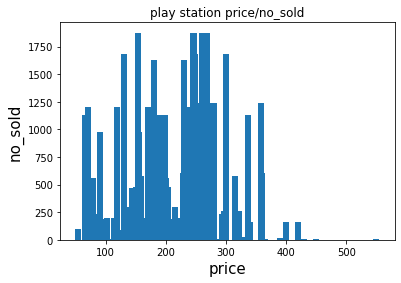

In [28]:
price1=list(dict.fromkeys(price))
price1=price[0:57]
print(len(price1))

no_sold1=list(dict.fromkeys(no_sold))
print(len(no_sold1))

plt.bar(price, no_sold,width=10)
plt.xlabel('price', fontsize=15)
plt.ylabel('no_sold', fontsize=15)
plt.title('play station price/no_sold')

plt.show()

in below programing , i am manupulating the data to make sure the graph out put is clearly understand for the user. this data is taken from the iphone csv

646
42


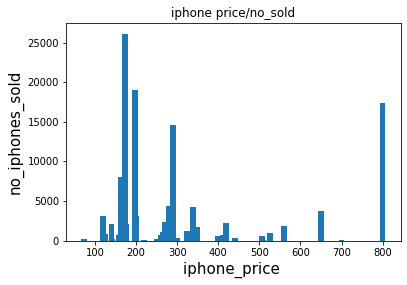

In [29]:
iphonepl1=list(dict.fromkeys(iphonepl))
iphone_price=iphonepl1
print(len(iphonepl))
sold_items1=list(dict.fromkeys(sold_items))
sold_items=sold_items1[0:42]
no_iphones_sold=sold_items
print(len(sold_items))
plt.bar(iphone_price,no_iphones_sold,width=14)
plt.xlabel('iphone_price ', fontsize=15)
plt.ylabel('no_iphones_sold', fontsize=15)
plt.title('iphone price/no_sold')

plt.show()

in below programing , i am manupulating the data to make sure the graph out put is clearly understand for the user. this data is taken from the iwatch csv

80
80


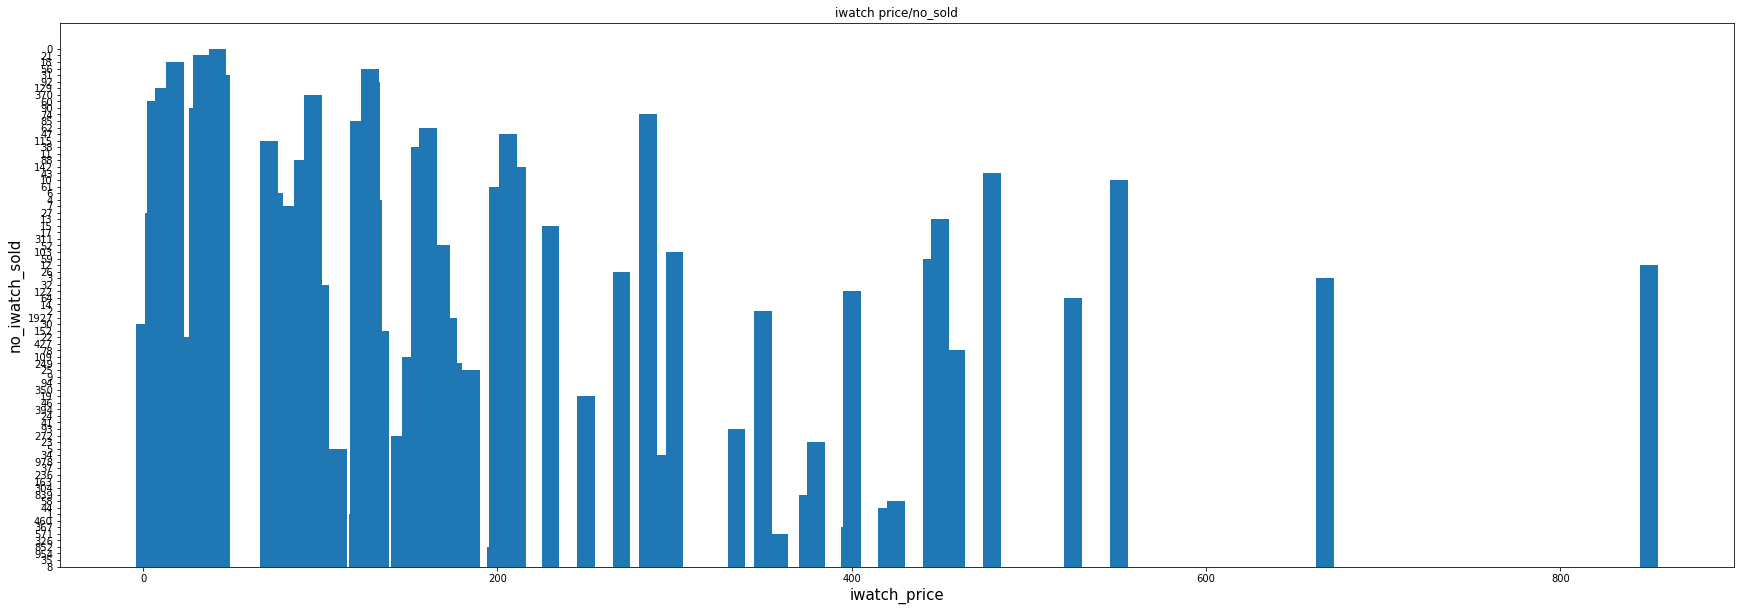

In [33]:
iwatch1=list(dict.fromkeys(iwatch))
iwatch=iwatch1[0:80]
iwatch_price=iwatch
print(len(iwatch))
iwatchsold1=list(dict.fromkeys(iwatchsold))
no_iwatch_sold=iwatchsold1[0:80]
print(len(no_iwatch_sold))
plt.bar(iwatch_price,no_iwatch_sold,width=10)
plt.rcParams["figure.figsize"] = (30,10)
plt.xlabel('iwatch_price', fontsize=15)
plt.ylabel('no_iwatch_sold', fontsize=15)
plt.title('iwatch price/no_sold')

plt.show()

in below programing , i am manupulating the data to make sure the graph out put is clearly understand for the user. this data is taken from the hover csv

19
19


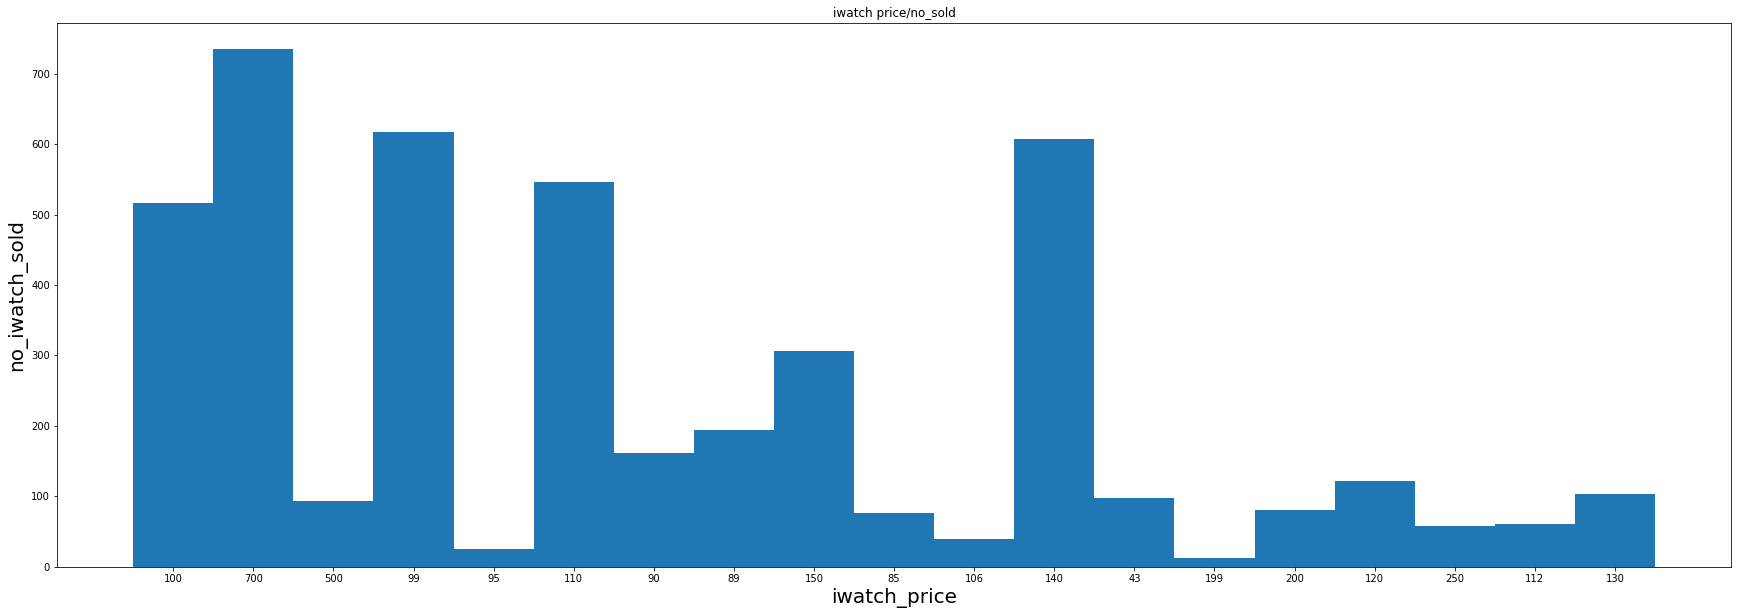

In [35]:
hoverpricee=list(dict.fromkeys(hoverprice))
hoverpricee=hoverpricee[0:19]
print(len(hoverpricee))
hoversoldd=list(dict.fromkeys(hoversold))
hoversoldd=hoversoldd[0:19]
print(len(hoversoldd))
plt.bar(hoverpricee,hoversoldd,width=1)
plt.rcParams["figure.figsize"] = (30,10)
plt.xlabel('iwatch_price', fontsize=20)
plt.ylabel('no_iwatch_sold', fontsize=20)
plt.title('iwatch price/no_sold')
plt.show()



this below code will plot the graph for  number of salesfor all different products 

128187
132521
373299
66564
128187


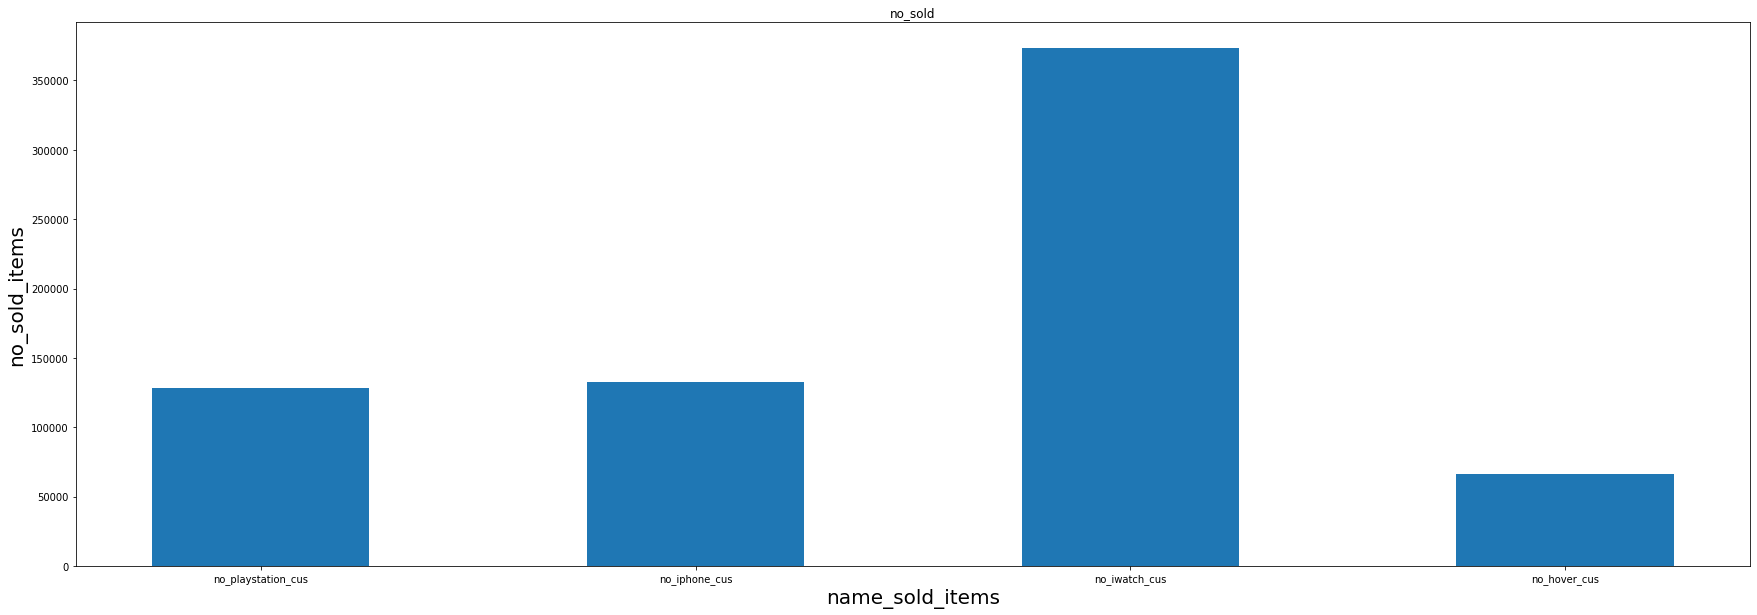

In [61]:

total_no_playstation_cus=sum(no_sold)
print(total_no_playstation_cus)
total_no_iphone_cus=sum(sold_items)
print(total_no_iphone_cus)
total_no_iwatch_cus=sum(iwatchsold)
print(total_no_iwatch_cus)
total_no_hover_cus=sum(hoversold)
print(total_no_hover_cus)
total_number_of_buyers={'no_playstation_cus': total_no_playstation_cus,'no_iphone_cus':total_no_iphone_cus,'no_iwatch_cus':total_no_iwatch_cus,'no_hover_cus':total_no_hover_cus}
print(total_number_of_buyers['no_playstation_cus'])  


plt.bar(range(len(total_number_of_buyers)), list(total_number_of_buyers.values()), align='center',width=0.5)
plt.xticks(range(len(total_number_of_buyers)), list(total_number_of_buyers.keys()))
plt.xlabel('name_sold_items', fontsize=20)
plt.ylabel('no_sold_items', fontsize=20)
plt.title('no_sold')


plt.show()
